### charger des modules

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Préparer et recueillir des données

In [3]:
import os

path = os.listdir('brain_tumor/Training/')
print(path)
classes = {'no_tumor':0, 'pituitary_tumor':1}

['no_tumor', 'pituitary_tumor']


In [4]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [5]:
X = np.array(X)
Y = np.array(Y)
X_updated = X.reshape(len(X), -1)

In [6]:
np.unique(Y)

array([0, 1])

In [7]:
pd.Series(Y).value_counts()

1    827
0    395
Name: count, dtype: int64

In [8]:
print(type(X))
print(X.dtype)
print(X.ndim)
print(X.shape)
print(X.size)

<class 'numpy.ndarray'>
uint8
3
(1222, 200, 200)
48880000


In [9]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

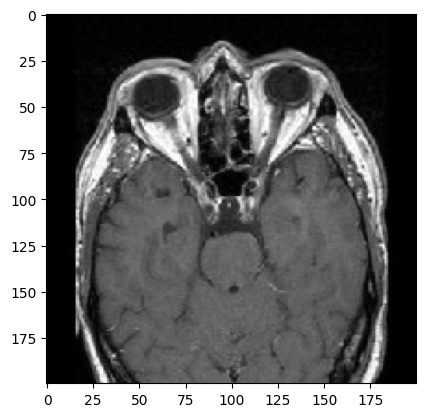

In [17]:
plt.imshow(X[0], cmap='gray')

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.40)

In [15]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0


In [16]:
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())


1.0 0.0
1.0 0.0


In [18]:
from sklearn.decomposition import PCA

In [25]:
print(xtrain.shape, xtest.shape)

pca = PCA(2)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)


(733, 40000) (489, 40000)


In [26]:
print(pca_train.shape, pca_test.shape)
print(pca.n_components)


(733, 2) (489, 2)
2


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [29]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [30]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [32]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(xtrain, ytrain)


RandomForestClassifier()

In [33]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9406952965235174


In [34]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9877216916780355
Testing Score: 0.9611451942740287


In [35]:
print("Training Score:", rf.score(xtrain, ytrain))
print("Testing Score:", rf.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9693251533742331
